<a id='home'></a>
# Investigation of Ford GoBike's trip data


## Table of Contents
- [Introduction](#intro)
- [Part I - Wrangling](#wrangling)
- [Part II - Univariate Exploration](#ue)
- [Part III - Bivariate Exploration](#be)
- [Part IV - Multivariate Exploration](#me)



<a id='Introduction'></a>
## Introduction

Ford GoBike has increasingly gained popularity as one of the best bike sharing facilitator present in the United States. In this report we would focus on the customer behaviour which would help us understand our target customer. We would also be seeing the duration of trips and other essential targets such as the station's to understand more.

<a id='question'></a>
### Questions -
- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?

In [40]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [41]:
# Load data
df = pd.read_csv('201808-fordgobike-tripdata.csv')

In [42]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(192162, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         69465  2018-08-31 19:18:08.6130  2018-09-01 14:35:54.0640   
1         60644  2018-08-31 21:40:01.7490  2018-09-01 14:30:46.4470   
2         57922  2018-08-31 20:04:28.1630  2018-09-01 12:09:50.8240   
3         82573  2018-08-31 13:07:14.9020  2018-09-01 12:03:28.2600   
4         57677  2018-08-31 19:48:45.1980  2018-09-01 11:5

In [43]:
# Check on the statistics 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,192162.000000,189250.000000,192162.000000,192162.000000,189250.000000,192162.000000,192162.000000,192162.000000,181247.000000
mean,871.052700,123.507672,37.766253,-122.343527,122.601020,37.766362,-122.343112,2181.434378,1983.623001
std,2413.884799,102.127505,0.112896,0.239326,102.802511,0.112819,0.239081,1204.464636,10.313485
min,61.000000,3.000000,37.312854,-122.473658,3.000000,37.312854,-122.473658,11.000000,1888.000000
25%,355.000000,36.000000,37.770407,-122.409449,30.000000,37.771058,-122.408445,1176.000000,1978.000000
50%,564.000000,91.000000,37.781074,-122.395526,90.000000,37.781270,-122.395526,2231.000000,1986.000000
75%,887.000000,195.000000,37.797673,-122.274894,195.000000,37.798014,-122.278175,3169.000000,1991.000000
max,85967.000000,367.000000,45.510000,-73.570000,367.000000,45.510000,-73.570000,4466.000000,2000.000000


### What is the structure of your dataset?
Our data contains 192162 records for 16 columns

### What is/are the main feature(s) of interest in your dataset?

Our basic aim is to find when has the most number of trips been taken , whether an average time for subscriber differs from customer , if so then what would this difference mean to us ? Hence , Duration and user_type seems to be a good start but thinking from a sales perspective we must also evaluate which station is more profitable for us. Also , from other sales persepctive we may also want to see about the type of customer on the basis of age/gender to target more customers use our service. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

As previously mentioned , Our main feature would be 
1. Station start 
2. Duration 
3. Station end 
4. User_type 

From sales perspective , 
1. Member_gender 
2. Member_birth_year

<a id='wrangling'></a>
## Wrangling

Add columns:
- *duration_min*: The duration in minutes
- *member_age*: the age of the customers present
- change *start_time* and *end_time* to datetime


In [44]:
# Add duration_min column
df['duration_min'] = df['duration_sec']/60

In [45]:
# change *start_time* and *end_time* to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [46]:
# Add member_age column
df['member_age'] = df['start_time'].dt.year - df['member_birth_year']

#### Test

In [47]:
# Test the Durations column
df.head()[['duration_sec', 'duration_min']]

,duration_sec,duration_min
0,69465,1157.750000
1,60644,1010.733333
2,57922,965.366667
3,82573,1376.216667
4,57677,961.283333


In [48]:
# Test the member age column
df[['member_birth_year', 'member_age']].sample(5)

,member_birth_year,member_age
106860,1993.0,25.0
147461,1967.0,51.0
62724,1985.0,33.0
90066,1979.0,39.0
181378,1989.0,29.0


In [49]:
# Test the start and end time data type
df[['start_time','end_time']].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


<a id='ue'></a>
## Univariate Exploration

I'll start by looking at the distribution of the Duration in minutes

In [50]:
# show some statistics by the log 
np.log10(df['duration_min']).describe()

count    192162.000000
mean          0.979937
std           0.329444
min           0.007179
25%           0.772077
50%           0.973128
75%           1.169772
max           3.156181
Name: duration_min, dtype: float64

In [51]:
# comparing with the log above 
df['duration_min'].describe()

count    192162.000000
mean         14.517545
std          40.231413
min           1.016667
25%           5.916667
50%           9.400000
75%          14.783333
max        1432.783333
Name: duration_min, dtype: float64

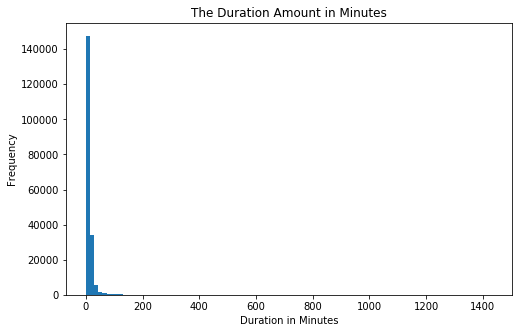

In [52]:
# plot of the Durations in minutes 
df['duration_min'].plot.hist(bins = 100 , figsize = (8 , 5))
plt.title('The Duration Amount in Minutes')
plt.xlabel('Duration in Minutes');

as we see from this plot that most of the records are below 100 minutes, so we are going to zome in to 100 minutes

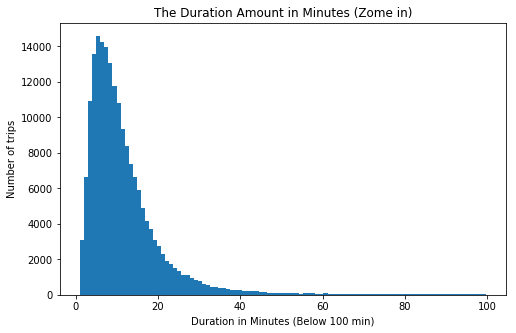

In [53]:
# plot of the Durations in minutes (zome in)
df.query('duration_min < 100')['duration_min'].plot.hist(bins = 100 ,figsize = (8 , 5))
plt.title('The Duration Amount in Minutes (Zome in)')
plt.xlabel('Duration in Minutes (Below 100 min)');
plt.ylabel('Number of trips');

In [54]:
# show some statistics of duration under 100 
df.query('duration_min < 100')['duration_min'].describe().to_frame()

,duration_min
count,190435.000000
mean,11.880290
std,9.945657
min,1.016667
25%,5.883333
50%,9.333333
75%,14.583333
max,99.700000


It looks like values are distributed up till the last end. So there is no outlier as expected. We can finally use the log scale on x-axis to see the output with better interpretations

Looks like the curve is skewed towards the right. So lets plot the graph on the log scale on the x-axis


In [55]:
# show some statistics by log
np.log10(df['duration_min']).describe()

count    192162.000000
mean          0.979937
std           0.329444
min           0.007179
25%           0.772077
50%           0.973128
75%           1.169772
max           3.156181
Name: duration_min, dtype: float64

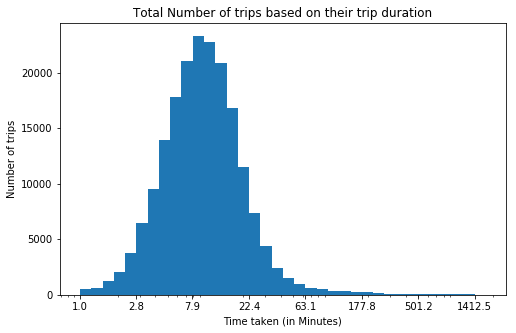

In [56]:
# plot of Total Number of trips based on their trip duration
log_binsize = 0.09
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)

plt.xscale('log')
bins = np.around(10 ** np.arange(0, 3.5, .45), 1)
plt.xticks(bins, bins)

plt.xlabel('Time taken (in Minutes)')
plt.ylabel('Number of trips')
plt.title('Total Number of trips based on their trip duration');

We can see that the peak is at the point slightly less than 0.2 and the graph is more like the normal curve but is skewed slightly to the right.

### Lets see the *most* and the *least* common/popular starting stations

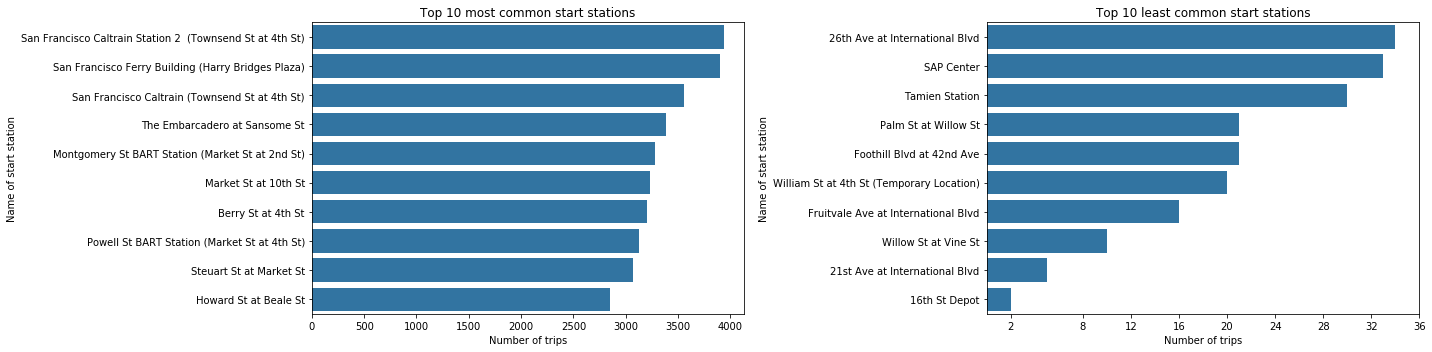

In [57]:
base_color = sb.color_palette()[0]
fig = plt.figure(figsize = [20, 5])

# the plot on the left: Top 10 most common start stations
plt.subplot(1, 2, 1)
neighbourhood_counts = df['start_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
ax1 = sb.countplot(data = df, y = 'start_station_name', order = neighbourhood_order[:10], color=base_color)
plt.xlabel('Number of trips')
plt.ylabel('Name of start station')
plt.title('Top 10 most common start stations');


# the plot on the right: Top 10 least common start stations
plt.subplot(1, 2, 2)
neighbourhood_counts = df['start_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
ax2 = sb.countplot(data = df, y = 'start_station_name', order = neighbourhood_order[-10:], color=base_color)
plt.xticks((2,8,12,16,20,24,28,32,36))
plt.xlabel('Number of trips')
plt.ylabel('Name of start station')
plt.title('Top 10 least common start stations');
x_labels = np.arange(0, 19, 2)


fig.tight_layout();

- We can see In the first plot the top 10 names of the stations having most number of trips starting from is `San Francisco Caltrain Station 2  (Townsend St at 4th St)`

- We can see In the second plot the top 10 names of the stations havivng least no of trips starting from is `SF Test Station`

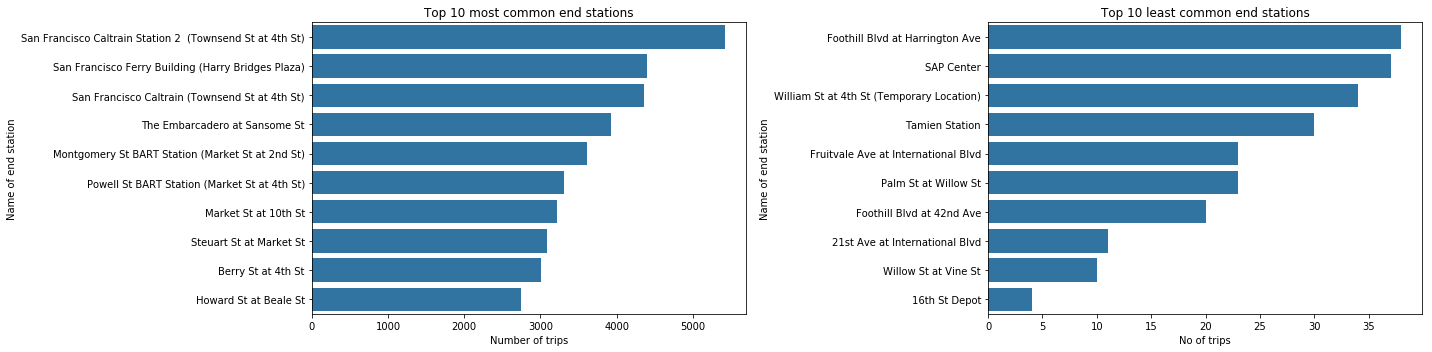

In [58]:
fig = plt.figure(figsize = [20, 5])

# the plot on the left: Top 10 most common end stations
plt.subplot(1, 2, 1)
neighbourhood_counts = df['end_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = df, y = 'end_station_name', order = neighbourhood_order[:10], color=base_color)
plt.xlabel('Number of trips')
plt.ylabel('Name of end station')
plt.title('Top 10 most common end stations');


# the plot on the right: Top 10 least common end stations
plt.subplot(1, 2, 2)
neighbourhood_counts = df['end_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = df, y = 'end_station_name', order = neighbourhood_order[-10:], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of end station')
plt.title('Top 10 least common end stations');

fig.tight_layout() 

- We can see In the first plot the top 10 names of the stations having most number of trips starting from is `San Francisco Caltrain Station 2  (Townsend St at 4th St)`

- We can see In the second plot the top 10 names of the stations havivng least no of trips ending at is `Foothill Bivd at Harrington Ave`

From the last few graphs we can see that: 
- the most popular station is `San Francisco Caltrain Station 2 (Townsend St at 4th St)`, since it is in the top of the *start from* and *end at* stations in common plots

- the least popular station is `SAP Center`, since it is the in the 2nd place of the *start from* and *end at* stations in least common plots

### Lets see the distribution of gender for all the people who participated in the trips

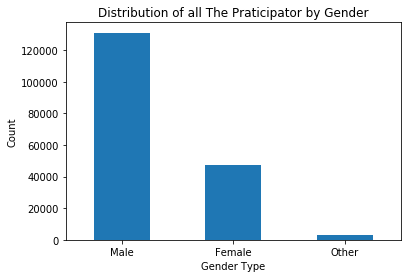

In [59]:
# plot of the Distribution of all The Praticipator by Gender
df.member_gender.value_counts().plot(kind = 'bar',rot = 0).set(xlabel = 'Gender');
plt.title('Distribution of all The Praticipator by Gender');
plt.xlabel('Gender Type');
plt.ylabel('Count');

We can see that males dominate the distribution. More than half of the rides are done by males.

### Lets see whats the age for the people who mostly participate in the trips

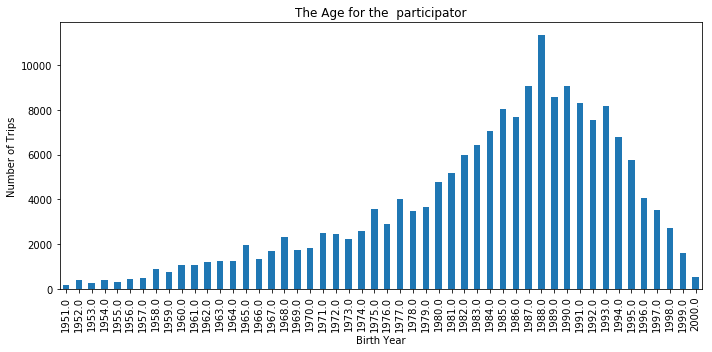

In [60]:
# plot of The Age for the  participator
plt.figure(figsize = [10, 5])
mm = df[df['member_birth_year'] > 1950]
mm.member_birth_year.value_counts().sort_index().plot(kind = 'bar')
plt.title('The Age for the  participator')
plt.xlabel('Birth Year')
plt.ylabel('Number of Trips');
plt.tight_layout();


We can see that people near the age of 30 are mostly invloved in the road trips and the distribution is highly skewed towards right. Also we can see that there are hardly any person going for a ride after the age of 75.


### Lets see the variation based on the day of the week. Is there any particular favourite for starting the trips or they are at random.


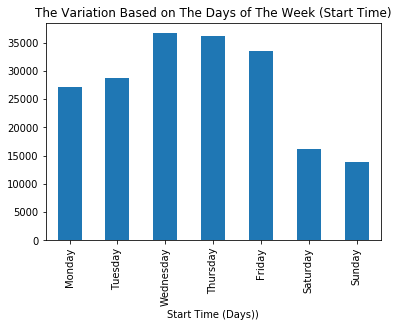

In [61]:
## A list of days in the order that you need them:
dayofweek = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']   

## Name the series to be plotted (allows you to access the index later):
day_counts = df.start_time.dt.dayofweek.map(dayofweek).value_counts()

## Re order the series index:
day_counts = day_counts.reindex(index = days)

## Plot the series:
a = day_counts.plot(kind = 'bar')

# use index as tick labels
a.set_xticks(range(len(day_counts.index)))
a.set_xticklabels(day_counts.index)
a.set_xlabel('Start Time (Days))')
plt.title('The Variation Based on The Days of The Week (Start Time)')
plt.show();

There seems to be spike in the ride during the mid week than in the other days. Also , The amount of rides decrease in the weekend. We can pretty well say that most of the office - goers love renting a bike from GoBike


Lets see the variation based on the day of the week. Is there any particular favourite for ending the trips or they are at random.

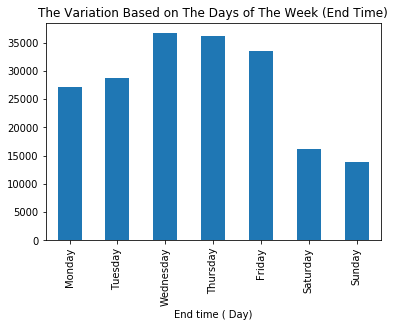

In [62]:
## Name the series to be plotted (allows you to access the index later):
day_counts = df.start_time.dt.dayofweek.map(dayofweek).value_counts()
day_counts = day_counts.reindex(index = days)
## Plot the series:
a = day_counts.plot(kind = 'bar')

# use index as tick labels
a.set_xticks(range(len(day_counts.index)))
a.set_xticklabels(day_counts.index)
plt.title('The Variation Based on The Days of The Week (End Time)')
a.set_xlabel('End time ( Day)')
plt.show()

The above graph shows that most of the rides were ended on Tuesday and the least on Saturday. 

As the distribution for start and end is almost similar, we can conclude that most of the trips are completed on the same day

### Lets have a look at the most popular bike models which were used for the trips. 


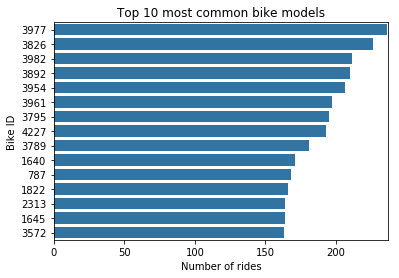

In [63]:
# plot of most common bike models
neighbourhood_counts = df['bike_id'].value_counts()
neighbourhood_order = neighbourhood_counts.index
plt.xlim(0,df['bike_id'].value_counts().max() + 1)
sb.countplot(data = df, y = 'bike_id', order = neighbourhood_order[0:15], color=base_color)
plt.xlabel('Number of rides')
plt.ylabel('Bike ID')
plt.title('Top 10 most common bike models');

We can see that the bike having bike-id as `3750` is having the most no of rides. 

### Lets have a look at the least popular bike models which were used for the trips

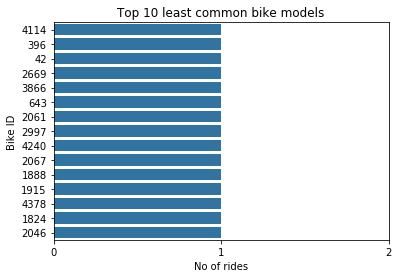

In [64]:
# plot of Top 10 least common bike models
neighbourhood_counts = df['bike_id'].value_counts()
neighbourhood_order = neighbourhood_counts.index
plt.xlim(0,df['bike_id'].value_counts().min() + 1)
sb.countplot(data = df, y = 'bike_id', order = neighbourhood_order[-15:], color=base_color)
x_labels = [0,1,2]
plt.xticks(x_labels, x_labels)

plt.xlabel('No of rides')
plt.ylabel('Bike ID')
plt.title('Top 10 least common bike models');

We can see that the bike having bike-id as '1590', '3034', '4231', '5744', '187', '2102', '6033', '6170', '2420',
       '6621', '6345', '2188', '5708', '806', '6940', '3579', '6829', '786',
       '3402', '1053', '3644', '6388', '2383', '180', '2118', '2785', '4868',
       '3682', '2658', '1816', '1119', '1614', '2280', '245', '5621', '617',
       '189', '3214', '6599' are having the least no of rides whose value is 1.

<a id='be'></a>
## Bivariate Exploration

### Lets see the participation in trips based on day of the week and the gender of the people

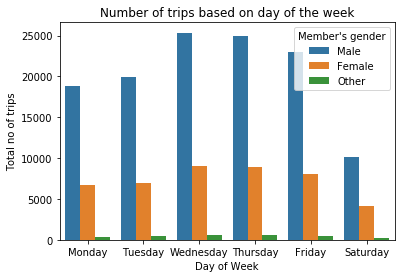

In [65]:
# plot of Number of trips based on day of the week
df['start_day'] = df['start_time'].dt.day_name()
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=df, x='start_day', hue='member_gender', order=x_marker);
plt.title('Number of trips based on day of the week')
plt.xlabel('Day of Week')
plt.ylabel('Total no of trips');
plt.legend(title = "Member's gender");


The above graph shows that most of the trips are done on Tuesday and the least on Friday. The ratio of gender is almost same for all the days based on the gender.



Lets see the participation in trips based on day of the week and the type of user subscription



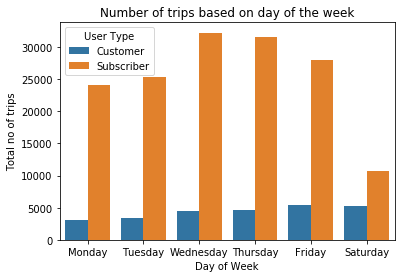

In [66]:
# Number of trips based on day of the week
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=df, x='start_day', hue='user_type', order=x_marker);
plt.title('Number of trips based on day of the week')
plt.xlabel('Day of Week')
plt.ylabel('Total no of trips');
plt.legend(title = "User Type");


The above graph shows that most of the people having the trips are subscriber. Also the no of customers for all days are almost same. This concludes that the ratio of customer on Saturday is the highest.



Lets see the participation in trips based on day of the week and the share of bike for the entire trip

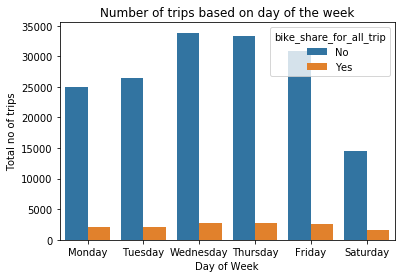

In [67]:
# plot of Number of trips based on day of the week
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=df, x='start_day', hue='bike_share_for_all_trip', order=x_marker);
plt.title('Number of trips based on day of the week')
plt.xlabel('Day of Week')
plt.ylabel('Total no of trips');

The above graph shows that there are very few no of people who have bike share for all trip. Most of the time this is not true.

### Lets see a representation for people born after 1970s for individual user types

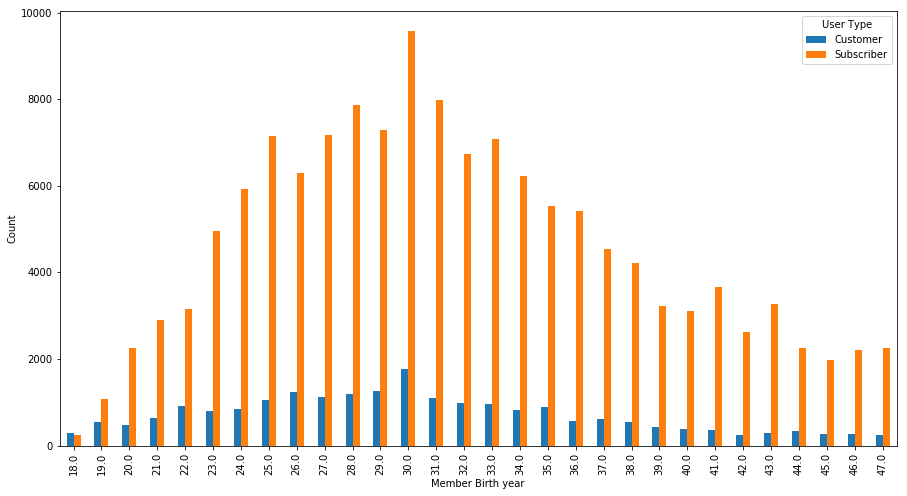

In [68]:
# plot of Member Birth year
pd.crosstab(df.query('member_birth_year > 1970')['member_age'] ,
            df.query('member_birth_year > 1970')['user_type']).plot(kind = 'bar' , figsize = (15 ,8))
plt.xlabel('Member Birth year')
plt.ylabel('Count')
plt.legend(title = 'User Type');

We can see that 30 year old have the highest for Customers as well as Subscribers.

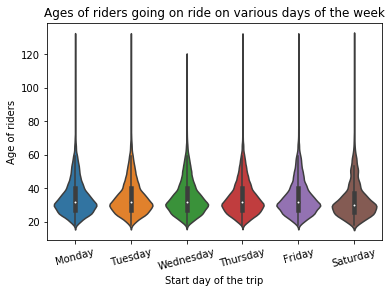

In [69]:
# plot of Ages of riders going on ride on various days of the week
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.violinplot(data = df, x='start_day', y = 'member_age', order = x_marker)
plt.xticks(rotation=15)
plt.xlabel('Start day of the trip')
plt.ylabel('Age of riders')
plt.title('Ages of riders going on ride on various days of the week');

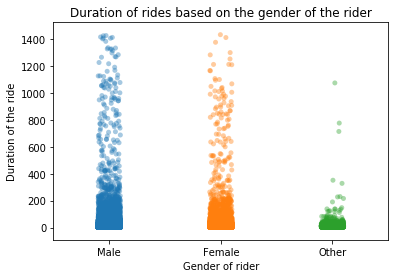

In [70]:
# plot of Duration of rides based on the gender of the rider
sb.stripplot(data = df, x = 'member_gender', y = 'duration_min', alpha = 0.4)
plt.xlabel('Gender of rider')
plt.ylabel('Duration of the ride')
plt.title('Duration of rides based on the gender of the rider');

<a id='me'></a>
## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between price and carat.

In [71]:
# creating new column (start_hour)
df['start_hour'] = df['start_time'].dt.hour

# creating some variables we will use it later
numeric_vars = ['duration_sec', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude',
                'end_station_longitude', 'start_hour', 'member_age']
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

### Lets start with the correlation plot


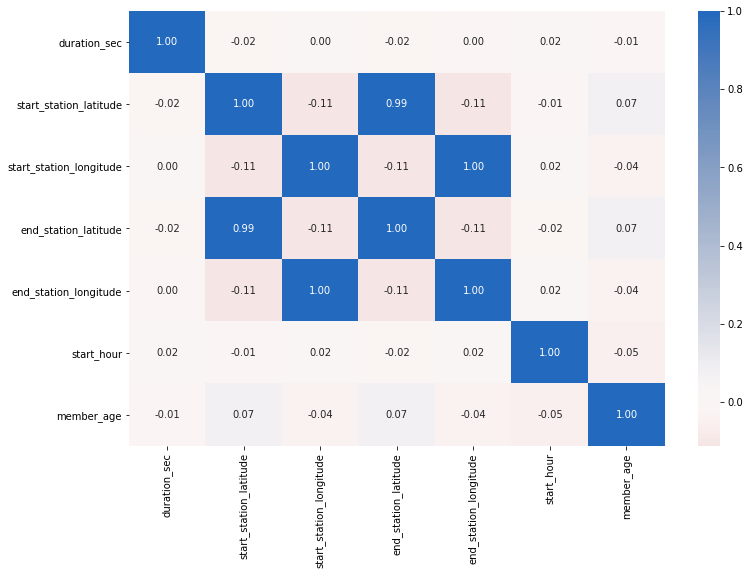

In [72]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)

plt.show()

From the above plot we can see that there are few variables which are highly correlated to some other variables either having positive correlation or negative correlation.

We are going ahead with the boxplot in this section , Since we want to find the averaging cause. We have a population data where the male riders are more in amount and it would be pretty unfair to only target Male customers on that note

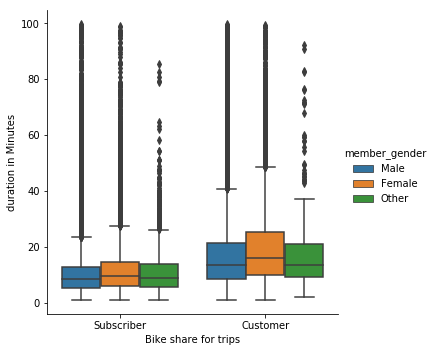

In [73]:
# plot of Bike share for trips with duration in Minutes by gender
g = sb.catplot(x="user_type", y="duration_min", hue="member_gender", kind="box",
                  data=df.query('duration_min < 100'))
g.set_xlabels('Bike share for trips')
g.set_ylabels('duration in Minutes');

As we can see here , Female customers tend to travel more in duration than Male Customers in terms of the Boxplot. Infact , This trend can also be noticed in the Subscriber too. Another pretty important thing we can observe is Female customers tend to take more duration than Female subscribers

One of the interesting plot could be to see behavorial aspect in terms of the day of the week. We would be able to check a certain trend

We now want to see whether the day has any impact from the above ?

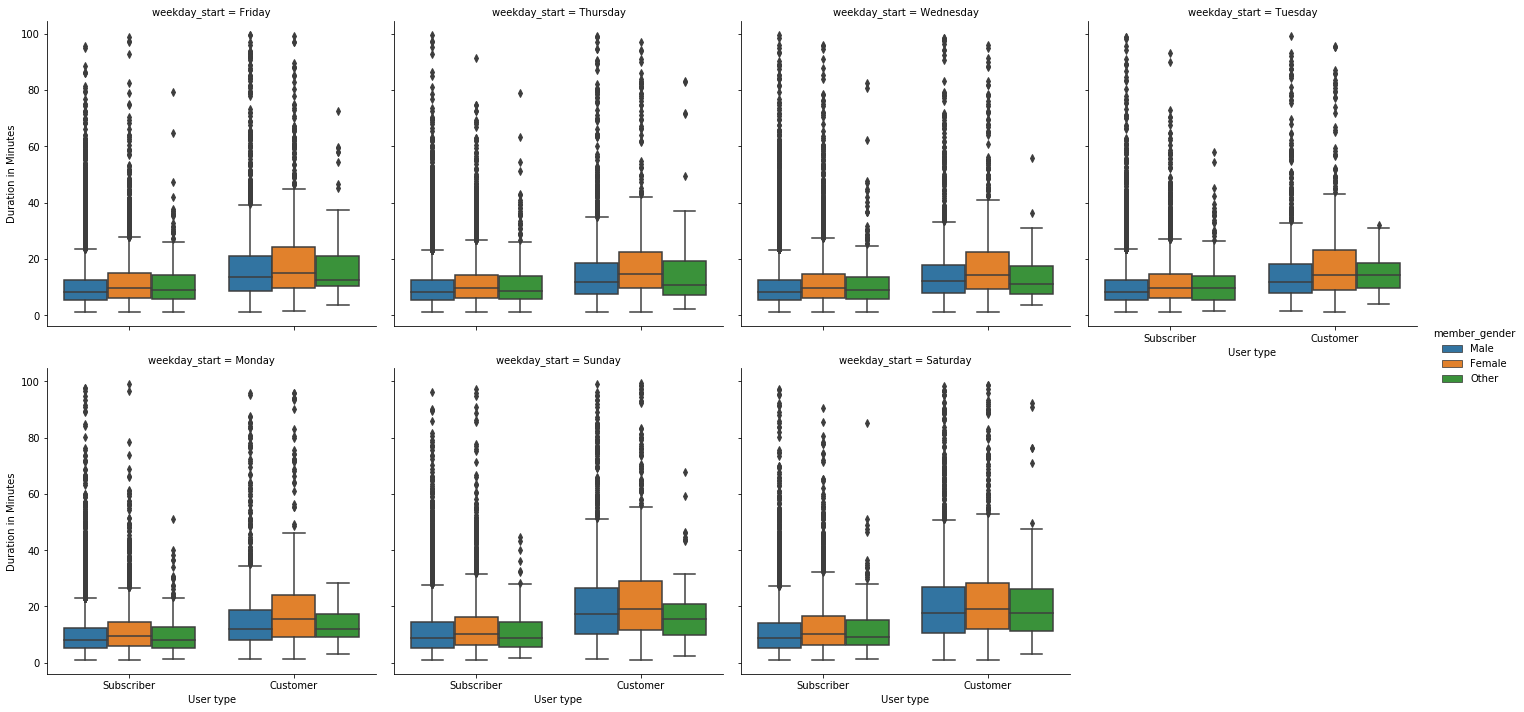

In [74]:
# multible plots of user type with duration of trip by gender
df['weekday_start'] = df.start_time.dt.dayofweek.map(dayofweek)
g = sb.catplot(x="user_type", y="duration_min",col = 'weekday_start',hue="member_gender",col_wrap=4, kind="box",
                  data=df.query('duration_min < 100'))
g.set_xlabels('User type')
g.set_ylabels('Duration in Minutes');

In terms of the above figure , We can see that Male customers as well as Female customers tend to have a longer duration on Saturday and Sunday.

This particular trend can be super useful. We can expect higher duration of rides on Saturday and Sunday even though the numbers on the particular days are low.

**In terms of the user types and Gender , We may want to see the distribution of data when we compare to the age to get a good sense of idea**

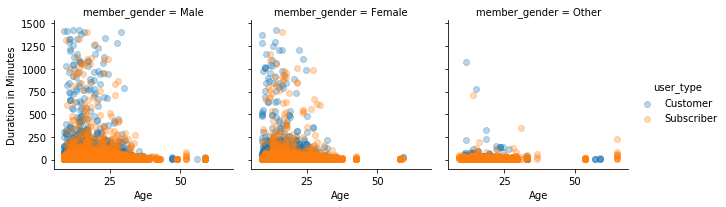

In [75]:
# plot of distribution of data when we compare to the age
g = sb.FacetGrid(data=df ,col = 'member_gender' , hue = 'user_type')
g.map(plt.scatter , 'member_age','duration_min' , alpha = 0.3).add_legend()
g.set_xlabels('Age')
g.set_ylabels('Duration in Minutes')
g.set_xticklabels();

As we can see that Male and Female riders whether they are subscriber or customer tend to have a similar duration in terms of age.

### Now lets move to the Pair wise grid for the above variables

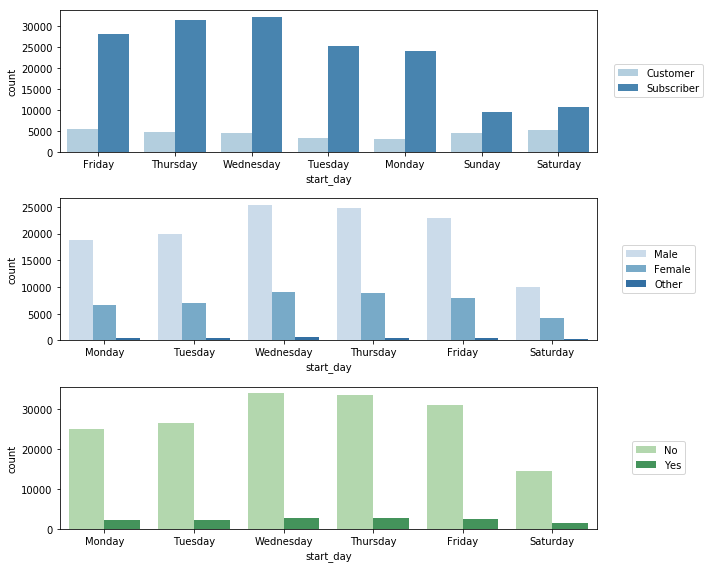

In [76]:
fig = plt.figure(figsize = [10, 8])
df['start_day'] = df['start_time'].dt.day_name()

x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']

# subplot 1: start_day vs user_type
ax = plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'start_day', hue = 'user_type', palette = 'Blues')
ax.legend(loc='center', bbox_to_anchor=(1.115, 0.5))

# subplot 2: start_day vs. member_gender
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'start_day', hue = 'member_gender', palette = 'Blues', order = x_marker)
ax.legend(loc='center', bbox_to_anchor=(1.115, 0.5)) 

# subplot 3: start_day vs. bike_share_for_all_trip
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'start_day', hue = 'bike_share_for_all_trip', palette = 'Greens', order = x_marker)
ax.legend(loc='center', bbox_to_anchor=(1.115, 0.5)) 

fig.tight_layout();

<a id='conclusions'></a>
## Conclusions

Finally I am going to conclude this report as follows :- 
    1. Subscribers tend to be more regular , Weekday seems to be perfect though the duration is lower as compared to Saturday and Sunday 
    2. There are more amount of Male subscriber , though Female subscribers tend to show similar trend as compared to Male counter-part 
    3. Bike sharers tend to spend more duration as comapred to Non sharers. Though the data is undistributed we cannot actually determine it as a fact. 
    
We must try to increase the total amount of ridership for the weekend since the weekend shows a good increase in the duration at which the bikes are rented. Our target audience can be 25 to 35 year old since they tend to use our service much often than the others. Bike share is not pretty profitable since not many of them are using it. Hence , We must market that aspect onto the picture to increase the numbers. 